In [24]:
pip install tensorflow[and-cuda]

INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/276.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/276.6 MB 1.3 MB/s eta 0:03:37
   ---------------------------------------- 0.1/276.6 MB 1.1 MB/s eta 0:04:04
   ---------------------------------------- 0.1/276.6 MB 1.0 MB/s eta 0:04:30
   ---------------------------------------- 0.2/276.6 MB 1.5 MB/s eta 0:03:02
   ---------------------------------------- 0.4/276.6 MB 1.9 MB/s eta 0:02:30
   ---------------------------------------- 0.6/276.6 MB 2.3 MB/s eta 0:02:00
   ---------------------------------------- 0.7/276.6 MB 2.8 MB/s eta 0:01:40
   ---------------------------------------- 0.9/276.6 MB 2.9 MB/s eta 0:01:34
   ---------------------------------------- 0.9/276.6 MB 2.9 MB/s eta 0:01:34
   ---------------------------------------- 1.1/276.6 MB 2.9 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
sqlalchemy 2.0.25 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.3.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [25]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.00,322726.53,0.00,279489.00,558978.0,838467.00,1117956.00
MonsoonIntensity,1117957.0,4.92,2.06,0.00,3.00,5.0,6.00,16.00
TopographyDrainage,1117957.0,4.93,2.09,0.00,3.00,5.0,6.00,18.00
RiverManagement,1117957.0,4.96,2.07,0.00,4.00,5.0,6.00,16.00
Deforestation,1117957.0,4.94,2.05,0.00,4.00,5.0,6.00,17.00
Urbanization,1117957.0,4.94,2.08,0.00,3.00,5.0,6.00,17.00
ClimateChange,1117957.0,4.93,2.06,0.00,3.00,5.0,6.00,17.00
DamsQuality,1117957.0,4.96,2.08,0.00,4.00,5.0,6.00,16.00
Siltation,1117957.0,4.93,2.07,0.00,3.00,5.0,6.00,16.00
AgriculturalPractices,1117957.0,4.94,2.07,0.00,3.00,5.0,6.00,16.00


<Axes: xlabel='MonsoonIntensity', ylabel='count'>

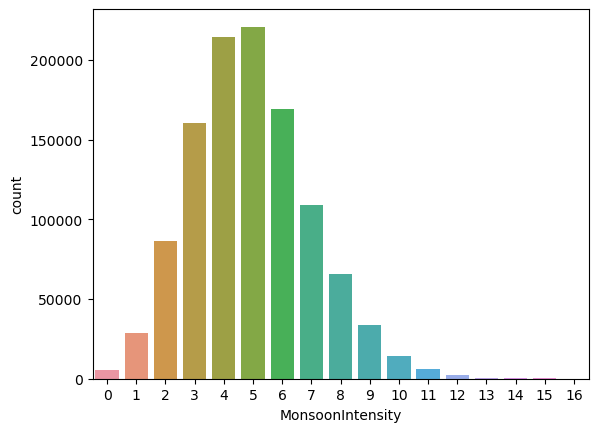

In [5]:
sns.countplot(df,x='MonsoonIntensity')

In [6]:
grp = df.groupby('MonsoonIntensity')

In [7]:
grp.first()

,id,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,,,,,,,,,,,,,,,,,,,,,
0,76,5,4,0,4,4,5,2,2,5,...,4,6,4,4,6,3,4,3,4,0.365
1,41,6,7,6,5,8,4,7,3,2,...,5,6,2,5,3,3,4,6,4,0.455
2,27,5,6,5,4,8,4,4,5,5,...,5,5,4,7,8,6,5,5,8,0.525
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,9,2,3,5,8,6,5,5,7,6,...,6,3,3,4,4,3,3,5,6,0.455
5,0,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
6,1,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
7,11,4,5,4,4,2,4,6,6,4,...,6,6,2,4,7,7,8,3,0,0.480
8,6,3,1,2,3,7,3,4,6,7,...,2,5,6,4,5,6,3,4,6,0.460


C:\Users\Sankha Mondal\AppData\Local\Temp\ipykernel_16312\3748550438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FloodProbability'])
C:\Users\Sankha Mondal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Density'>

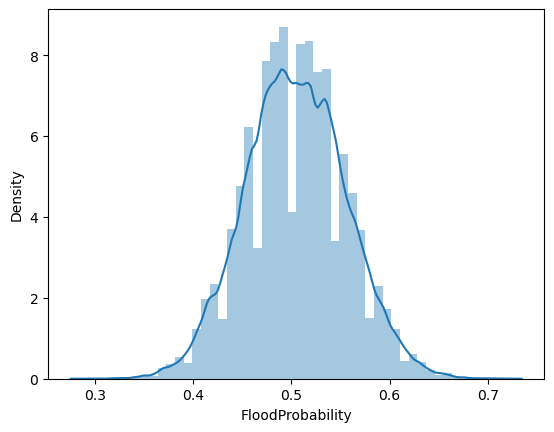

In [8]:
sns.distplot(df['FloodProbability'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('FloodProbability',axis=1)
y = df['FloodProbability']

In [11]:
X.shape, y.shape

((1117957, 21), (1117957,))

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
predictions = lr.predict(X_test)

In [27]:
mean_squared_error(y_test,predictions)

0.00040278964888531204

In [28]:
np.sqrt(mean_squared_error(y_test,predictions))

0.02006962004835448

In [29]:
mean_absolute_error(y_test,predictions)

0.015787813412681026

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
model = Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=100)

Epoch 1/100
6114/6114 [==============================] - 7s 1ms/step - loss: 0.0117 - val_loss: 5.1734e-04
Epoch 2/100
6114/6114 [==============================] - 6s 945us/step - loss: 4.1331e-04 - val_loss: 3.9147e-04
Epoch 3/100
6114/6114 [==============================] - 6s 947us/step - loss: 3.9087e-04 - val_loss: 3.8568e-04
Epoch 4/100
6114/6114 [==============================] - 6s 937us/step - loss: 3.8135e-04 - val_loss: 3.7617e-04
Epoch 5/100
6114/6114 [==============================] - 6s 940us/step - loss: 3.6771e-04 - val_loss: 3.6228e-04
Epoch 6/100
6114/6114 [==============================] - 6s 969us/step - loss: 3.6597e-04 - val_loss: 3.6143e-04
Epoch 7/100
6114/6114 [==============================] - 6s 923us/step - loss: 3.6513e-04 - val_loss: 3.6196e-04
Epoch 8/100
6114/6114 [==============================] - 6s 910us/step - loss: 3.6506e-04 - val_loss: 3.6502e-04
Epoch 9/100
6114/6114 [==============================] - 6s 935us/step - loss: 3.6472e-04 - val_loss: 

In [ ]:
predictions_ann = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,predictions_ann)

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions_ann))

In [ ]:
mean_absolute_error(y_test,predictions_ann)

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df.head()

In [ ]:
test_df.drop('id',axis=1,inplace=True)

In [ ]:
test_df_scaled = scaler.fit_transform(test_df)

In [ ]:
test_df_scaled

In [ ]:
X_test.shape, test_df_scaled.shape

In [ ]:
predictions_test = model.predict(test_df_scaled)

In [ ]:
test_df['FloodProbability'] = predictions_test.round(2)

In [ ]:
test_df.head()

In [ ]:
submission_df = test_df[['id','FloodProbability']]

In [ ]:
from google.colab import files

In [ ]:
submission_df.to_csv('submission.csv')
files.download('submission.csv')